In [1]:
# storing and anaysis
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt


In [2]:
def sigmoid(h): 
  return 1/(1+np.exp(-h))

def cross_entropy(y, p_hat):
  return -(1/len(y)) * np.sum(y*np.log(p_hat) + (1-y)*np.log(1-p_hat))

def accuracy(y, y_hat):
  return np.mean(y == y_hat)

In [3]:
class LogisticRegression():

  def __init__ (self, thresh = 0.5):
    self.thresh = thresh
    self.w = None
    self.b = None

  def fit(self, X, y, eta = 1e-3, epochs = 1e3, show_curves = False):
    epochs = int(epochs)
    N, D = X.shape

    try: # if self.w or self.b is not created it will be created
       self.W # so you can pull out the wieghts and bias
    except AttributeError:          # and place them back into the model
      self.w = np.random.randn(D) # Pull weights out: weights = glr.w
      self.b = np.random.randn(1) # Put weights back in: glr.w = weights

    J = np.zeros(epochs)

    for epoch in range(epochs):

      p_hat = self._forward(X)
      J[epoch] = cross_entropy(y, p_hat)
      self.w -= eta*(1/N)*X.T@(p_hat - y) # updates the w
      self.b -= eta*(1/N)*np.sum(p_hat - y) # updates the b

    try:
      pd.read_csv('weights.csv')
    except:
      pd.DataFrame(self.w).to_csv('weights.csv', index=False)

    if show_curves:
      plt.figure()
      plt.plot(J)
      plt.xlabel('Epochs')
      plt.ylabel('$\matchcal(J)')
      plt.title('Training Curve')
      plt.show()
  
  def _forward(self, X):
     return sigmoid(X@self.w + self.b)

  def predict(self, X):
    return (self._forward(X) >= self.thresh).astype(np.int32)

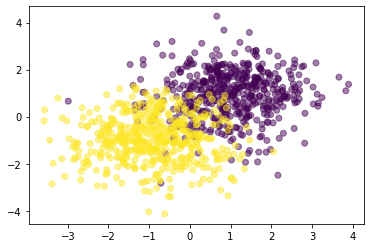

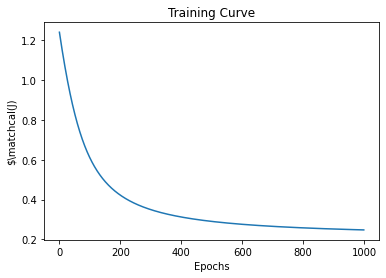

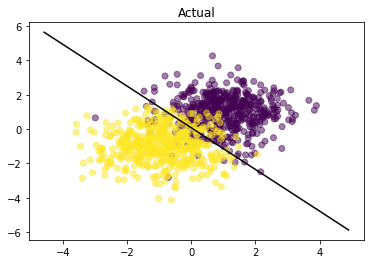

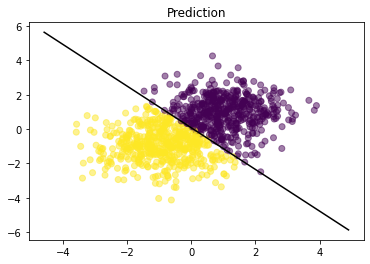

Training Accuracy:  0.9060


In [4]:
def main():
  N = 1000
  D = 2

  x0 = np.random.randn((N//2), D) + np.array([1,1])
  x1 = np.random.randn((N//2), D) + np.array([-1,-1])
  X = np.vstack((x0,x1))

  y = np.array( [0]*(N//2) + [1]*(N//2) )

  plt.figure()
  plt.scatter(X[:,0], X[:,1], c= y, alpha = 0.5)
  plt.show()

  df = pd.DataFrame(X)
  df = pd.concat([df, pd.DataFrame(y)], axis = 1)
  df.to_csv("LogReg2.csv")

  log_reg = LogisticRegression()
  w = pd.read_csv('weights.csv').to_numpy()
  log_reg.w = w
  log_reg.fit(X, y, eta = 1e-2 ,show_curves = True)
  y_hat = log_reg.predict(X)
  

  pd.DataFrame(log_reg.w).to_csv('weights.csv')

  X1 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 1000)
  X2 = -(log_reg.b/log_reg.w[1]) - (log_reg.w[0]/log_reg.w[1])*X1

  plt.figure()
  plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
  plt.plot(X1, X2, color="#000000")
  plt.title('Actual')
  plt.show()

  plt.figure()
  plt.scatter(X[:, 0], X[:, 1], c=y_hat, alpha=0.5)
  plt.plot(X1, X2, color="#000000")
  plt.title('Prediction')
  plt.show()

  print(f"Training Accuracy:  {accuracy(y, y_hat):0.4f}")


if __name__=='__main__':
  main()